<a href="https://colab.research.google.com/github/InesZenkri/Calculator/blob/main/of_inital_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor


In [179]:
data = pd.read_csv("training_data_dump_2.csv")
print("Data Information:")
print(data.info())
print("\nData Statistics:")
print(data.describe())
x = data.iloc[:, :-4].values
y = data.iloc[:, -4:].values

scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Engine speed        216 non-null    float64
 1   Engine load         216 non-null    float64
 2   Railpressure        216 non-null    float64
 3   Air supply          216 non-null    float64
 4   Crank angle         216 non-null    float64
 5   Intake pressure     216 non-null    float64
 6   Back pressure       216 non-null    float64
 7   Intake temperature  216 non-null    float64
 8   NOx                 216 non-null    float64
 9   PM 1                216 non-null    float64
 10  CO2                 216 non-null    float64
 11  Pressure cylinder   216 non-null    float64
dtypes: float64(12)
memory usage: 20.4 KB
None

Data Statistics:
       Engine speed  Engine load  Railpressure   Air supply  Crank angle  \
count    216.000000   216.000000    216.000000   2

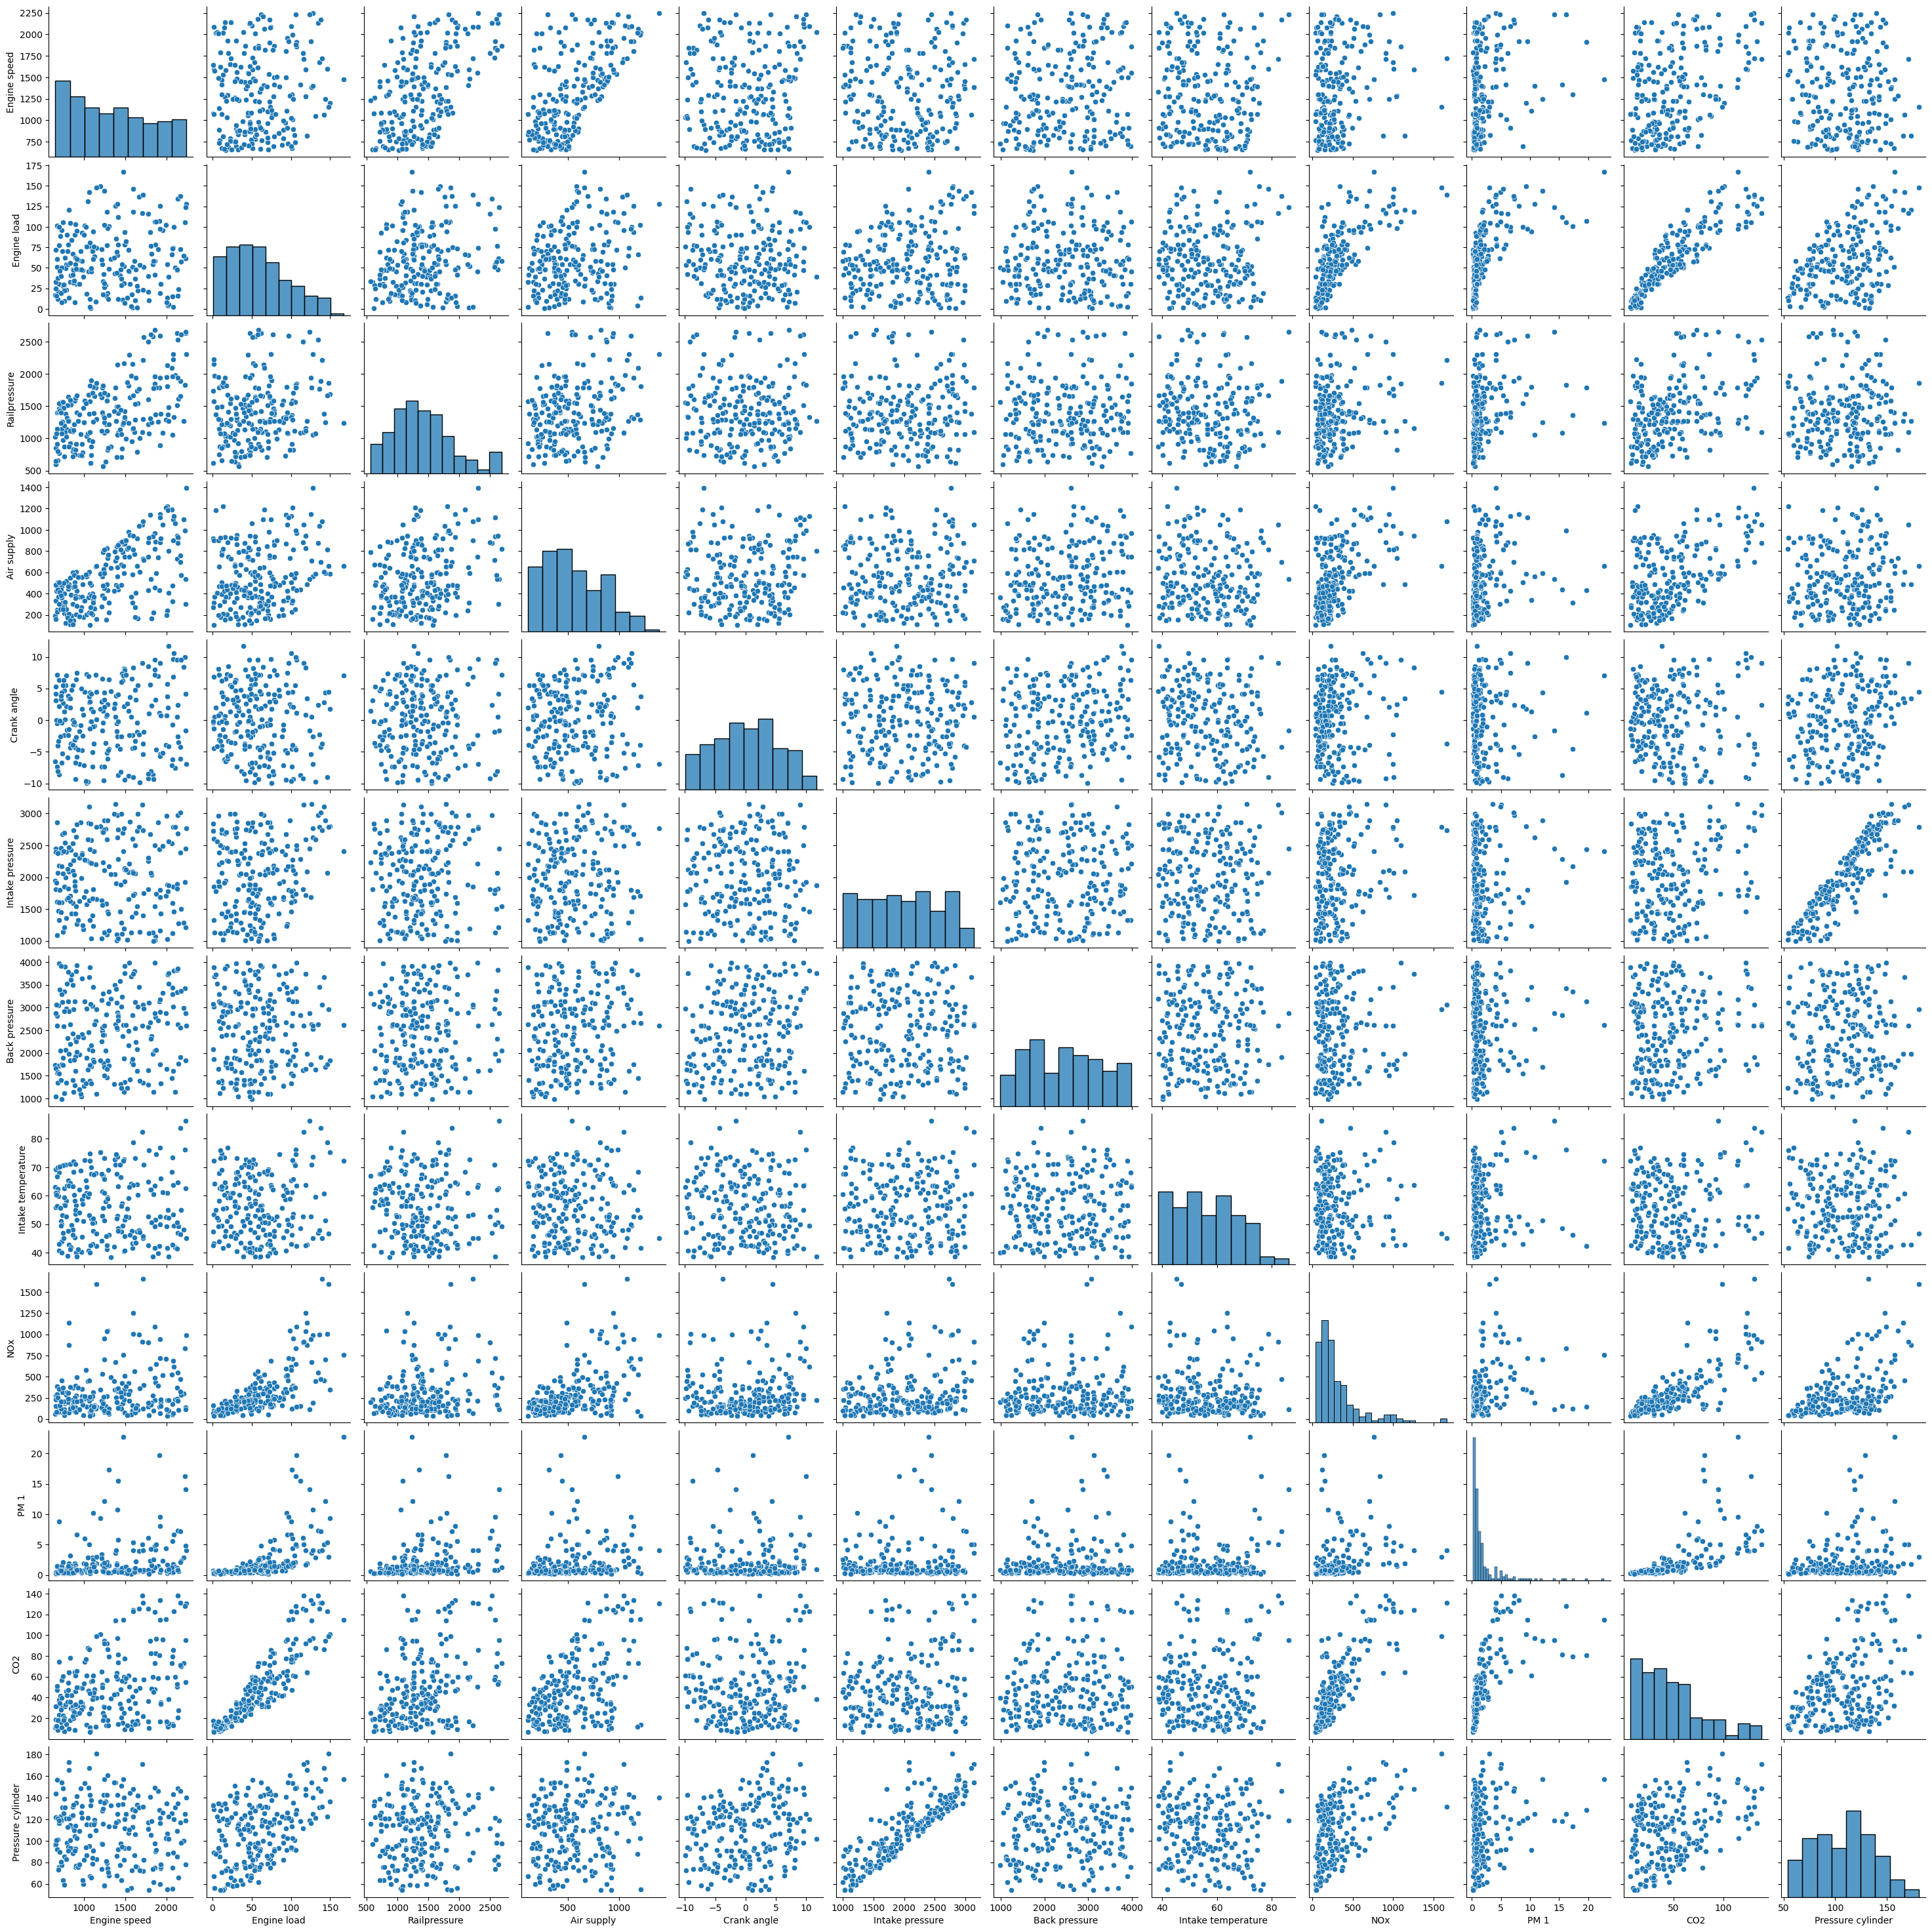

In [176]:
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

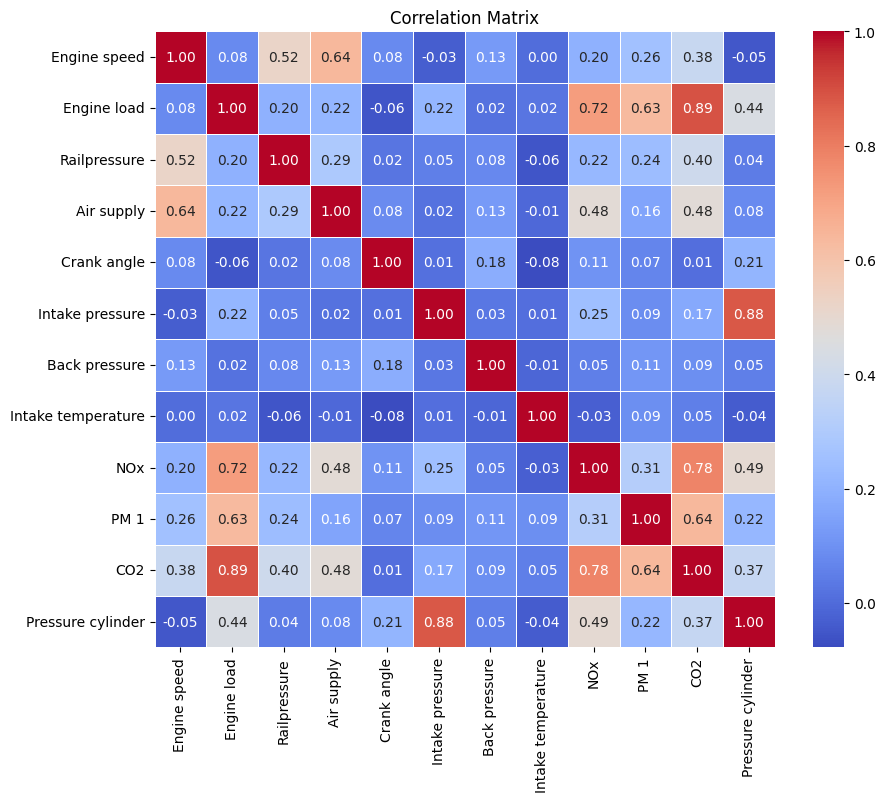

In [148]:
corr_matrix = data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
#plt.show()

In [180]:

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred_scaled = model.predict(x_val)

# Inverse transform the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_val = scaler_y.inverse_transform(y_val)

# Define the number of folds
n_folds = 5

# Initialize the stratified k-fold object
skf = StratifiedKFold(n_splits=n_folds)

# Initialize an empty list to store the mean squared error for each fold
mse_values = []
r2_scores_values = []

# Loop over each fold
for train_index, val_index in skf.split(x_scaled, y_scaled.argmax(1)):
    # Select the training and validation data
    x_train, x_val = x_scaled[train_index], x_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    # Train a Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)

    # Make predictions
    y_pred_scaled = model.predict(x_val)

    # Inverse transform the predictions and actual values
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_val = scaler_y.inverse_transform(y_val)

    # Compute the mean squared error and R-squared for this fold
    mse = mean_squared_error(y_val, y_pred)
    mse_values.append(mse)

    r2_scores = r2_score(y_val, y_pred, multioutput='raw_values')
    r2_scores_values.append(r2_scores)

# Compute the average mean squared error and R-squared across all folds
avg_mse = np.mean(mse_values)
avg_r2_scores = np.mean(r2_scores_values, axis=0)

print(f'Average Mean Squared Error on validation set: {avg_mse}')
for i, r2 in enumerate(avg_r2_scores):
    print(f'Average R-squared for Parameter {i+1}: {r2}')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(4):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(range(len(y_val[:, i])), y_val[:, i], color='b', label='Actual')
    axs[row, col].scatter(range(len(y_pred[:, i])), y_pred[:, i], color='r', label='Predicted')
    axs[row, col].set_xlabel('Index')
    axs[row, col].set_ylabel('Value')
    axs[row, col].set_title(f'Parameter {i+1}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

mse = mean_squared_error(y_val, y_pred)

print(f'Mean Squared Error on validation set: {mse}')

# Compute R-squared for each parameter
r2_scores = r2_score(y_val, y_pred, multioutput='raw_values')

for i, r2 in enumerate(r2_scores):
    print(f'R-squared for Parameter {i+1}: {r2}')

ValueError: y should be a 1d array, got an array of shape (173, 4) instead.

In [162]:
# Prepare data with selected significant features for training
x_train_dict = {}
y_train_dict = {}
y_train = data.iloc[:, -4:]


for output_param, features in significant_features.items():
    x = data[features]
    x_train, x_test, y_train_param, y_test = train_test_split(x, y_train[output_param], test_size=0.3, random_state=42)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    x_train_dict[output_param] = x_train_scaled
    y_train_dict[output_param] = y_train_param


KeyError: 'Intake temperature'

In [ ]:
#Initialize and train models for each output parameter
rf_models = {}
svr_models = {}
lr_models = {}
gb_models = {}
nn_models = {}

for output_param in output_parameters:
    lr_models[output_param] = LinearRegression()
    lr_models[output_param].fit(x_train_dict[output_param], y_train_dict[output_param])

    rf_models[output_param] = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_models[output_param].fit(x_train_dict[output_param], y_train_dict[output_param])

    svr_models[output_param] = SVR(kernel='rbf', C=1.0, epsilon=0.2)
    svr_models[output_param].fit(x_train_dict[output_param], y_train_dict[output_param])

    gb_models[output_param] = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_models[output_param].fit(x_train_dict[output_param], y_train_dict[output_param])

    nn_models[output_param] = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
    nn_models[output_param].fit(x_train_dict[output_param], y_train_dict[output_param])


In [ ]:
# Evaluation function
def evaluate_model(model_dict, significant_features, X_test, y_test):
    total_mse = 0
    total_samples = len(y_test)
    for output_param, model in model_dict.items():
        features = significant_features[output_param]
        x_test_param = X_test[features]
        y_pred_param = model.predict(x_test_param)
        mse_param = mean_squared_error(y_test[output_param], y_pred_param)
        total_mse += mse_param * len(y_test[output_param])  # Accumulate MSE for each parameter
    avg_mse = total_mse / total_samples  # Compute the average MSE across all parameters
    print(f"Average Mean Squared Error: {avg_mse}")

# Test models directly on the entire test dataset
if 'NOx' in significant_features:
    evaluate_model(lr_models, significant_features, x_test, y_test)
evaluate_model(svr_models, significant_features, x_test, y_test)

print("\nGradient Boosting Regression:")
evaluate_model(gb_models, significant_features, x_test, y_test)

print("\nNeural Network Regression:")
evaluate_model(nn_models, significant_features, x_test, y_test)